In [190]:
#Sumukh Anand Sinai Kunde

# Machine Learning in Agriculture

# The Toxic Pesticides

# Importing the Libraries

In [191]:
#Linear Algebra
import numpy as np
#Data Processing
import pandas as pd
#Data Visiulization library
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#import warnings
import warnings
warnings.filterwarnings("ignore")

# Getting the Data

In [192]:
train_data=pd.read_csv("agriculture_train.csv")
test_data=pd.read_csv("crop_test.csv")

In [193]:
#seeing the rows of training data
train_data

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...,...
4594,F00008078,2138,0,1,2,20,NaN,1,1,1
4595,F00008079,2139,0,1,2,30,47.0,2,1,1
4596,F00008080,2267,0,1,2,10,7.0,27,2,0
4597,F00008082,2267,0,1,2,10,20.0,24,2,0


In [194]:
#seeing test data rows
test_data

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1
...,...,...,...,...,...,...,...,...,...
1194,F00003133,1132,0,1,2,40,34.0,7,3
1195,F00003135,1132,0,1,2,40,25.0,3,1
1196,F00003138,1132,0,1,2,20,13.0,23,1
1197,F00003149,1212,0,1,2,10,35.0,5,1


In [195]:
#checking the shape of train and test data
print(train_data.shape)
print(test_data.shape)

(4599, 10)
(1199, 9)


# Train Data 

In [196]:
#checking the columns train_data
train_data.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

In [197]:
#checking shape of train data
train_data.shape

(4599, 10)

In [198]:
#checking data set information
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4599 entries, 0 to 4598
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       4599 non-null   object 
 1   Estimated_Insects_Count  4599 non-null   int64  
 2   Crop_Type                4599 non-null   int64  
 3   Soil_Type                4599 non-null   int64  
 4   Pesticide_Use_Category   4599 non-null   int64  
 5   Number_Doses_Week        4599 non-null   int64  
 6   Number_Weeks_Used        4157 non-null   float64
 7   Number_Weeks_Quit        4599 non-null   int64  
 8   Season                   4599 non-null   int64  
 9   Crop_Damage              4599 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 341.4+ KB


In [199]:
#checking null values
train_data.isnull().values.any()

True

In [200]:
train_data.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          442
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
dtype: int64

# Imputing values in Number_week_Used

In [201]:
train_data["Number_Weeks_Used"].fillna(train_data["Number_Weeks_Used"].mean(),inplace=True)

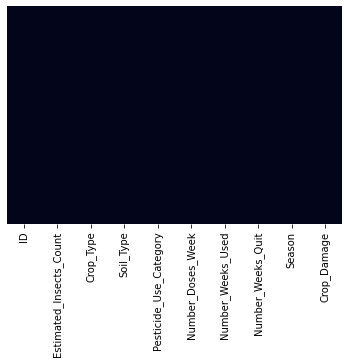

In [202]:
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False)

# Exploring Data Variable

In [203]:
#priting their object type and thier unique code
for column in train_data.columns:
    if train_data[column].dtypes==object:
        print(str(column)+" : "  +str(train_data[column].unique()))
        print(train_data[column].value_counts())
        print("*********************************************************************************************")
        print("/n")

ID : ['F00000001' 'F00000003' 'F00000004' ... 'F00008080' 'F00008082'
 'F00008083']
F00001630    1
F00005544    1
F00007703    1
F00005696    1
F00003935    1
            ..
F00004135    1
F00002839    1
F00003179    1
F00001495    1
F00000560    1
Name: ID, Length: 4599, dtype: int64
*********************************************************************************************
/n


In [204]:
print(train_data["Crop_Damage"].unique())

[0 1 2]


# In Agriculture train data 0-stands for Alive,1-Damage due to other cause,2-Damage due to Pesticide.

# In Agriculture train data target variable is Crop_Damage so i have to find how many crops are damage due to other cause,alive,damage due to Pesticide.

# EDA

# Visiulization

Plotting Crop_Damage

In [205]:
print(train_data["Crop_Damage"].value_counts())

0    3820
1     664
2     115
Name: Crop_Damage, dtype: int64


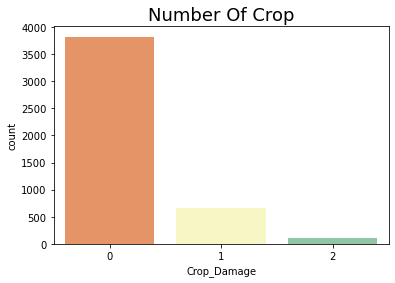

In [206]:
sns.countplot(x="Crop_Damage",data=train_data,palette="Spectral")
plt.title("Number Of Crop",fontsize=18)
plt.show()


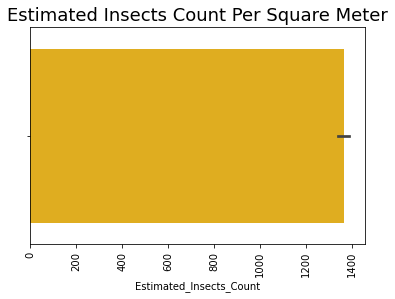

1132    193
1212    187
1385    182
1056    180
1478    177
       ... 
3515      7
151       7
169       4
231       4
4097      2
Name: Estimated_Insects_Count, Length: 71, dtype: int64


In [207]:
#Ploting Estimated_insects_counts
sns.barplot(x="Estimated_Insects_Count",data=train_data,palette="Wistia")
plt.title("Estimated Insects Count Per Square Meter",fontsize=18)
plt.xticks(rotation="vertical")
plt.show()
print(train_data["Estimated_Insects_Count"].value_counts())

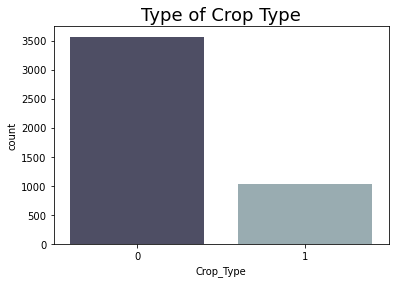

0    3565
1    1034
Name: Crop_Type, dtype: int64


In [208]:
#Ploting Crop_type
sns.countplot(x="Crop_Type",data=train_data,palette="bone")
plt.title("Type of Crop Type",fontsize=18)
plt.show()
print(train_data["Crop_Type"].value_counts())

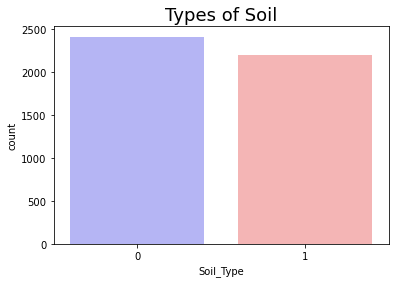

0    2407
1    2192
Name: Soil_Type, dtype: int64


In [209]:
#ploting soil type
sns.countplot(x="Soil_Type",data=train_data,palette="bwr")
plt.title("Types of Soil",fontsize=18)
plt.show()
print(train_data["Soil_Type"].value_counts())

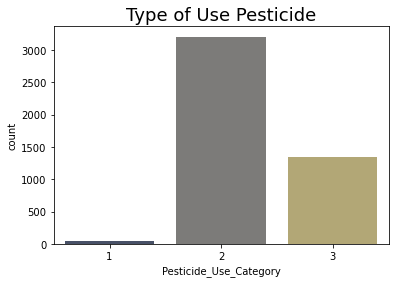

2    3205
3    1349
1      45
Name: Pesticide_Use_Category, dtype: int64


In [210]:
sns.countplot(x="Pesticide_Use_Category",data=train_data,palette="cividis")
plt.title("Type of Use Pesticide",fontsize=18)
plt.show()
print(train_data["Pesticide_Use_Category"].value_counts())

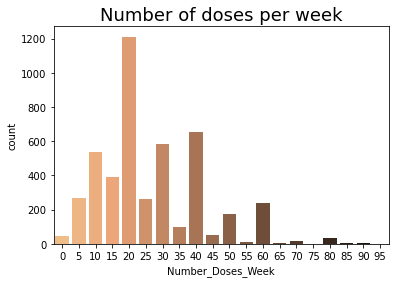

20    1211
40     657
30     584
10     537
15     393
5      268
25     263
60     237
50     172
35     101
45      53
0       45
80      36
70      17
55      11
90       5
85       4
65       3
75       1
95       1
Name: Number_Doses_Week, dtype: int64


In [211]:
#ploting number doses week
sns.countplot(x="Number_Doses_Week",data=train_data,palette="copper_r")
plt.title("Number of doses per week",fontsize=18)
plt.show()
print(train_data["Number_Doses_Week"].value_counts())

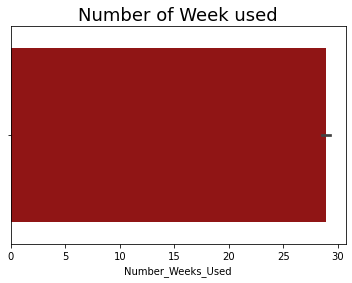

28.891027    442
20.000000    209
30.000000    194
25.000000    165
40.000000    133
            ... 
62.000000      5
59.000000      5
65.000000      3
66.000000      3
64.000000      1
Name: Number_Weeks_Used, Length: 64, dtype: int64


In [212]:
#ploting number of week used
sns.barplot(x="Number_Weeks_Used",data=train_data,palette="flag")
plt.title("Number of Week used",fontsize=18)
plt.show()
print(train_data["Number_Weeks_Used"].value_counts())

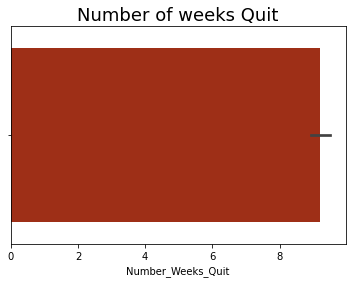

0     1496
14     146
2      145
6      140
12     137
15     136
10     134
5      134
1      133
20     131
8      125
3      124
13     123
7      122
9      118
4      117
11     116
16     105
17      94
19      87
18      83
22      83
21      74
23      54
24      52
25      48
28      46
29      41
26      41
27      37
30      34
31      25
32      21
33      16
34      16
35      11
37      11
41       9
38       9
36       8
40       4
39       3
42       3
44       2
43       2
47       2
46       1
Name: Number_Weeks_Quit, dtype: int64


In [213]:
#plotting number weeks quit
sns.barplot(x="Number_Weeks_Quit",data=train_data,palette="gnuplot")
plt.title("Number of weeks Quit",fontsize=18)
plt.show()
print(train_data["Number_Weeks_Quit"].value_counts())

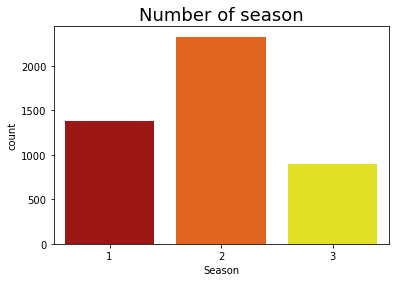

2    2327
1    1379
3     893
Name: Season, dtype: int64


In [214]:
#Plotting season
sns.countplot(x="Season",data=train_data,palette="hot")
plt.title("Number of season",fontsize=18)
plt.show()
print(train_data["Season"].value_counts())

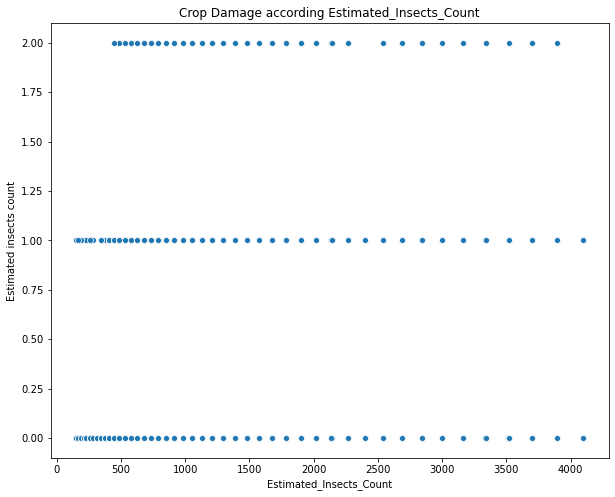

Estimated_Insects_Count  Crop_Damage
150                      0              16
                         1               1
151                      0               7
168                      0              11
                         1               2
                                        ..
3896                     2               1
4096                     1               8
                         0               6
4097                     0               1
                         1               1
Name: Crop_Damage, Length: 178, dtype: int64


In [215]:
#Estimated Insects Count vs Crop damage
plt.figure(figsize=(10,8))
sns.scatterplot(x="Estimated_Insects_Count",y="Crop_Damage",data=train_data,palette="inferno")
plt.title("Crop Damage according Estimated_Insects_Count")
plt.ylabel("Estimated insects count")
plt.show()
print(train_data.groupby("Estimated_Insects_Count")["Crop_Damage"].value_counts())

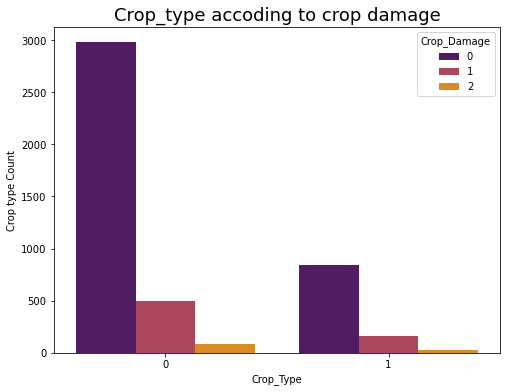

Crop_Type  Crop_Damage
0          0              2979
           1               498
           2                88
1          0               841
           1               166
           2                27
Name: Crop_Damage, dtype: int64


In [216]:
#Crop damage vs crop type
plt.figure(figsize=(8,6))
sns.countplot(x="Crop_Type",hue="Crop_Damage",data=train_data,palette="inferno")
plt.title("Crop_type accoding to crop damage",fontsize=18)
plt.ylabel("Crop type Count")
plt.show()
print(train_data.groupby("Crop_Type")["Crop_Damage"].value_counts())

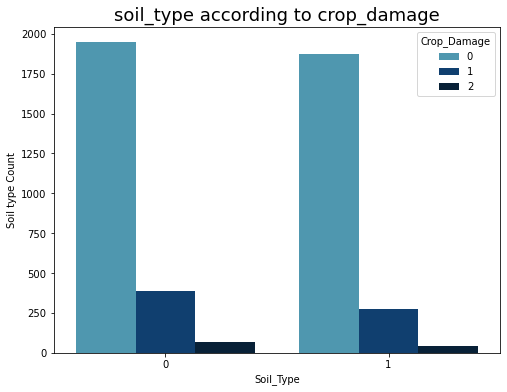

Soil_Type  Crop_Damage
0          0              1947
           1               390
           2                70
1          0              1873
           1               274
           2                45
Name: Crop_Damage, dtype: int64


In [217]:
#soil type vs crop damage
plt.figure(figsize=(8,6))
sns.countplot(x="Soil_Type",hue="Crop_Damage",data=train_data,palette="ocean_r")
plt.title("soil_type according to crop_damage",fontsize=18)
plt.ylabel("Soil type Count")
plt.show()
print(train_data.groupby("Soil_Type")["Crop_Damage"].value_counts())

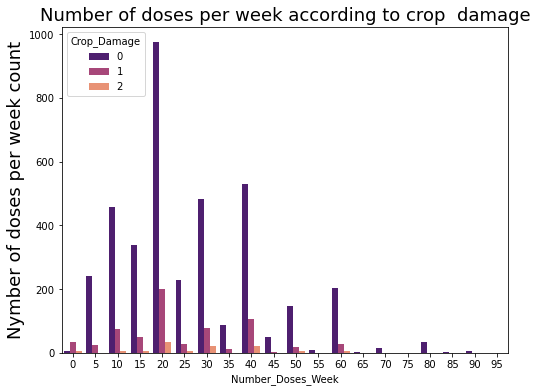

Number_Doses_Week  Crop_Damage
0                  1               33
                   0                7
                   2                5
5                  0              242
                   1               25
                   2                1
10                 0              457
                   1               75
                   2                5
15                 0              338
                   1               50
                   2                5
20                 0              975
                   1              201
                   2               35
25                 0              229
                   1               27
                   2                7
30                 0              484
                   1               79
                   2               21
35                 0               88
                   1               12
                   2                1
40                 0              529
                   

In [218]:
#number doses week vs crop damage
plt.figure(figsize=(8,6))
sns.countplot(x="Number_Doses_Week",hue="Crop_Damage",data=train_data,palette="magma")
plt.title("Number of doses per week according to crop  damage",fontsize=18)
plt.ylabel("Nymber of doses per week count",fontsize=18)
plt.show()
print(train_data.groupby("Number_Doses_Week")["Crop_Damage"].value_counts())

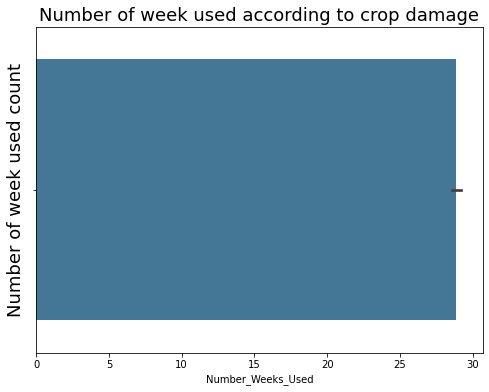

Number_Weeks_Used  Crop_Damage
0.0                1              29
                   0               6
                   2               5
5.0                0              31
                   1               2
                                  ..
64.0               0               1
65.0               1               2
                   0               1
66.0               0               2
                   1               1
Name: Crop_Damage, Length: 166, dtype: int64


In [219]:
#Number_Weeks_Used vs crop damage
plt.figure(figsize=(8,6))
sns.barplot(x="Number_Weeks_Used",hue="Crop_Damage",data=train_data,palette="mako")
plt.title("Number of week used according to crop damage",fontsize=18)
plt.ylabel("Number of week used count",fontsize=18)
plt.show()
print(train_data.groupby("Number_Weeks_Used")["Crop_Damage"].value_counts())

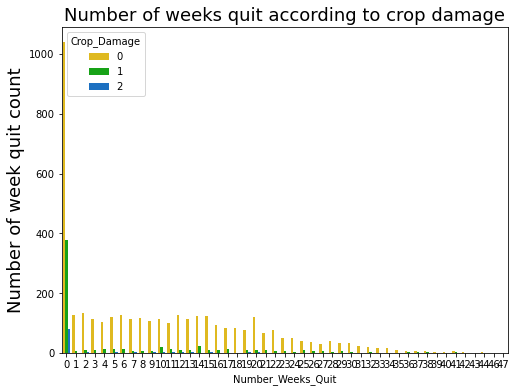

Number_Weeks_Quit  Crop_Damage
0                  0              1039
                   1               376
                   2                81
1                  0               127
                   1                 6
                                  ... 
43                 1                 1
44                 0                 2
46                 1                 1
47                 0                 1
                   1                 1
Name: Crop_Damage, Length: 106, dtype: int64


In [220]:
#ploting Number_Weeks_Quit vs crop damage
plt.figure(figsize=(8,6))
sns.countplot(x="Number_Weeks_Quit",hue="Crop_Damage",data=train_data,palette="nipy_spectral_r")
plt.title("Number of weeks quit according to crop damage",fontsize=18)
plt.ylabel("Number of week quit count",fontsize=18)
plt.show()
print(train_data.groupby("Number_Weeks_Quit")["Crop_Damage"].value_counts())

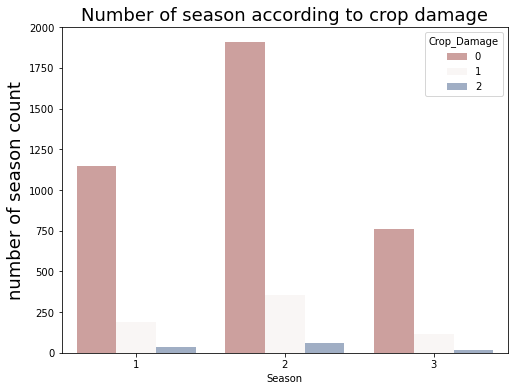

Season  Crop_Damage
1       0              1150
        1               192
        2                37
2       0              1908
        1               358
        2                61
3       0               762
        1               114
        2                17
Name: Crop_Damage, dtype: int64


In [221]:
#ploting season vs crop damage
plt.figure(figsize=(8,6))
sns.countplot(x="Season",hue="Crop_Damage",data=train_data,palette="vlag_r")
plt.title("Number of season according to crop damage",fontsize=18)
plt.ylabel("number of season count",fontsize=18)
plt.show()
print(train_data.groupby("Season")["Crop_Damage"].value_counts())

# There is only one categorical data in agriculture it is ID ,it do not provide any information about crops so i will drop the ID column from the Data

In [222]:
#droping column id from the data set
train_data.drop(["ID"],axis=1,inplace=True)

In [223]:
train_data

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188,1,0,1,0,0.000000,0,1,0
1,209,1,0,1,0,0.000000,0,2,1
2,257,1,0,1,0,0.000000,0,2,1
3,257,1,1,1,0,0.000000,0,2,1
4,342,1,0,1,0,0.000000,0,2,1
...,...,...,...,...,...,...,...,...,...
4594,2138,0,1,2,20,28.891027,1,1,1
4595,2139,0,1,2,30,47.000000,2,1,1
4596,2267,0,1,2,10,7.000000,27,2,0
4597,2267,0,1,2,10,20.000000,24,2,0


# By droping ID column all the column were numeric now the train data is ready for statistic summary,Now some step from train data  will follow in test data of Agriculture.

# Getting test data

# Test Data

In [224]:
test_data

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1
...,...,...,...,...,...,...,...,...,...
1194,F00003133,1132,0,1,2,40,34.0,7,3
1195,F00003135,1132,0,1,2,40,25.0,3,1
1196,F00003138,1132,0,1,2,20,13.0,23,1
1197,F00003149,1212,0,1,2,10,35.0,5,1


In [225]:
#checking columns of test data
test_data.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season'],
      dtype='object')

In [226]:
#checking shape of test data
test_data.shape

(1199, 9)

In [227]:
#checking data set information
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       1199 non-null   object 
 1   Estimated_Insects_Count  1199 non-null   int64  
 2   Crop_Type                1199 non-null   int64  
 3   Soil_Type                1199 non-null   int64  
 4   Pesticide_Use_Category   1199 non-null   int64  
 5   Number_Doses_Week        1199 non-null   int64  
 6   Number_Weeks_Used        1080 non-null   float64
 7   Number_Weeks_Quit        1199 non-null   int64  
 8   Season                   1199 non-null   int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 79.7+ KB


In [228]:
#checking null values in test data
test_data.isnull().values.any()

True

In [229]:
test_data.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          119
Number_Weeks_Quit            0
Season                       0
dtype: int64

# Imputing values in Number_Week_used

In [230]:
test_data["Number_Weeks_Used"].fillna(test_data["Number_Weeks_Used"].mean(),inplace=True)

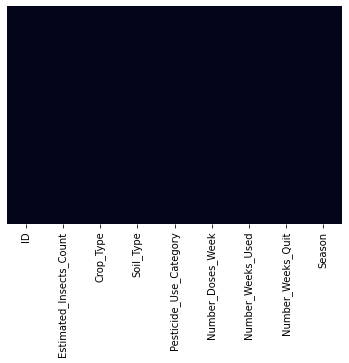

In [231]:
#checking by visiulization
sns.heatmap(test_data.isnull(),yticklabels=False,cbar=False)

# Exploring Data Variable

In [232]:
for column in test_data.columns:
    if test_data[column].dtypes==object:
        print(str(column)+ " : "+str(test_data[column].unique()))
        print(test_data[column].value_counts())
        print("************************************************************************************")
        print("/n")

ID : ['F00000002' 'F00000007' 'F00000011' ... 'F00003138' 'F00003149'
 'F00003150']
F00000161    1
F00001093    1
F00001521    1
F00000558    1
F00001096    1
            ..
F00000915    1
F00002021    1
F00000807    1
F00001438    1
F00000701    1
Name: ID, Length: 1199, dtype: int64
************************************************************************************
/n


# There is one Categorical data present that is ID,that do not provide any information on crops so i will drop the column ID in Agriculture test data.

In [233]:
test_data.drop(["ID"],axis=1,inplace=True)

In [234]:
test_data

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,188,1,1,1,0,29.033333,0,2
1,410,1,1,1,0,0.000000,0,2
2,626,1,0,1,0,0.000000,0,2
3,731,1,0,1,0,0.000000,0,2
4,789,0,0,1,0,0.000000,0,1
...,...,...,...,...,...,...,...,...
1194,1132,0,1,2,40,34.000000,7,3
1195,1132,0,1,2,40,25.000000,3,1
1196,1132,0,1,2,20,13.000000,23,1
1197,1212,0,1,2,10,35.000000,5,1


# Now all columns are in numeric types i will go forward and check the Summary Statistic and Correlation of train data.

# Summary Statistic

In [235]:
train_data.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000
mean,1363.000435,0.224831,0.476625,2.283540,26.477495,28.891027,9.205479,1.894325,0.194390
std,814.439120,0.417517,0.499508,0.471978,15.524647,11.965785,9.713253,0.694952,0.454597
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.891027,7.000000,2.000000,0.000000
75%,1786.000000,0.000000,1.000000,3.000000,40.000000,36.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,66.000000,47.000000,3.000000,2.000000


# Correlation

In [236]:
corr=train_data.corr()

In [237]:
corr

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
Estimated_Insects_Count,1.000000,-0.036911,-0.151796,-0.027111,-0.122509,0.427904,0.246719,-0.009482,0.202312
Crop_Type,-0.036911,1.000000,-0.175019,0.349662,-0.163832,-0.002128,-0.273475,-0.000549,0.021772
Soil_Type,-0.151796,-0.175019,1.000000,0.021661,0.050099,-0.093539,-0.034355,0.011052,-0.059481
Pesticide_Use_Category,-0.027111,0.349662,0.021661,1.000000,-0.005985,0.368106,-0.569467,0.008487,0.199195
Number_Doses_Week,-0.122509,-0.163832,0.050099,-0.005985,1.000000,0.099705,-0.032381,-0.003768,-0.018363
Number_Weeks_Used,0.427904,-0.002128,-0.093539,0.368106,0.099705,1.000000,-0.446200,-0.010590,0.231925
Number_Weeks_Quit,0.246719,-0.273475,-0.034355,-0.569467,-0.032381,-0.446200,1.000000,0.004861,-0.152918
Season,-0.009482,-0.000549,0.011052,0.008487,-0.003768,-0.010590,0.004861,1.000000,-0.016196
Crop_Damage,0.202312,0.021772,-0.059481,0.199195,-0.018363,0.231925,-0.152918,-0.016196,1.000000


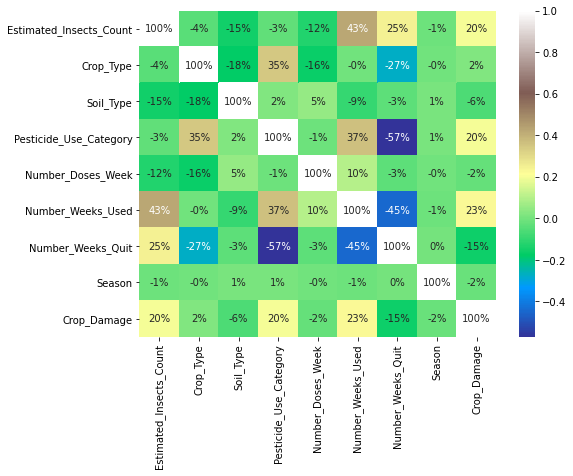

In [238]:
plt.figure(figsize=(8,6))
sns.heatmap(corr,annot=True,fmt=".0%",cmap="terrain")

# I can find better correlation after droping crop damage which is target variable from axis and visulize the all  column.

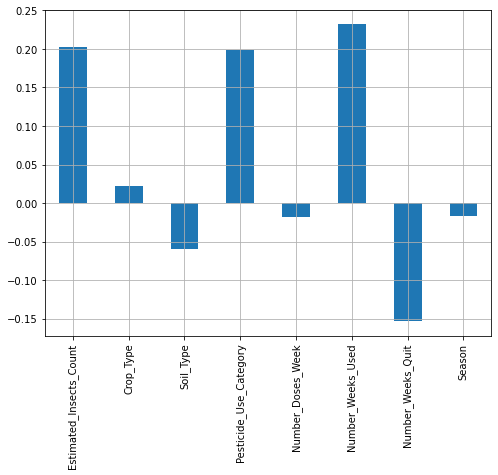

In [239]:
#correlation with target variable
plt.figure(figsize=(8,6))
train_data.drop("Crop_Damage",axis=1).corrwith(train_data["Crop_Damage"]).plot(kind="bar",grid=True)
plt.xticks(rotation="vertical")
plt.show()

# Plotting Outliers:

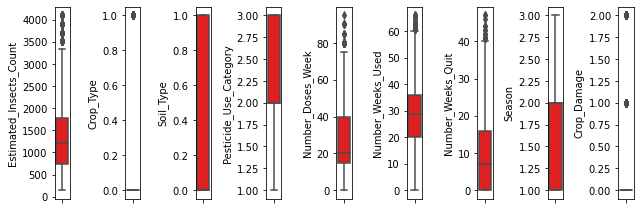

In [240]:
collist=train_data.columns.values
ncol=9
nrows=25
plt.figure(figsize=(ncol,ncol*8))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(train_data[collist[i]],color="red",orient="v")
    plt.tight_layout()


# Removing Outliers

In [241]:
#importing zscore for removing outliers
from scipy.stats import zscore
z=np.abs(zscore(train_data))
z

array([[1.44286807, 1.85681868, 0.95429408, ..., 0.94782668, 1.28702725,
        0.42765624],
       [1.41708065, 1.85681868, 0.95429408, ..., 0.94782668, 0.15207762,
        1.77233374],
       [1.35813798, 1.85681868, 0.95429408, ..., 0.94782668, 0.15207762,
        1.77233374],
       ...,
       [1.11008649, 0.53855555, 1.04789501, ..., 1.83218282, 0.15207762,
        0.42765624],
       [1.11008649, 0.53855555, 1.04789501, ..., 1.52329287, 0.15207762,
        0.42765624],
       [1.11008649, 0.53855555, 1.04789501, ..., 0.80254967, 0.15207762,
        0.42765624]])

In [242]:
threshold=3
print(np.where(z>3))
z

(array([   7,    9,   14,   22,   23,  100,  103,  112,  149,  165,  166,
        167,  179,  185,  186,  197,  207,  222,  223,  242,  248,  252,
        264,  265,  290,  296,  305,  316,  325,  346,  351,  355,  361,
        374,  375,  377,  384,  453,  458,  466,  480,  510,  517,  522,
        557,  595,  612,  634,  693,  702,  703,  704,  705,  706,  807,
        819,  855,  856,  911,  944,  978,  980,  998, 1017, 1019, 1067,
       1097, 1178, 1212, 1291, 1307, 1324, 1326, 1327, 1329, 1337, 1339,
       1340, 1341, 1342, 1343, 1344, 1345, 1346, 1347, 1347, 1348, 1349,
       1406, 1443, 1457, 1489, 1523, 1589, 1652, 1654, 1737, 1807, 1868,
       2019, 2043, 2090, 2136, 2139, 2140, 2165, 2170, 2171, 2174, 2183,
       2185, 2188, 2190, 2190, 2191, 2192, 2193, 2194, 2237, 2392, 2553,
       2565, 2585, 2589, 2590, 2590, 2591, 2615, 2663, 2671, 2696, 2702,
       2710, 2714, 2716, 2723, 2767, 2779, 2792, 2796, 2797, 2804, 2806,
       2814, 2828, 2829, 2834, 2841, 2842, 2851, 2

array([[1.44286807, 1.85681868, 0.95429408, ..., 0.94782668, 1.28702725,
        0.42765624],
       [1.41708065, 1.85681868, 0.95429408, ..., 0.94782668, 0.15207762,
        1.77233374],
       [1.35813798, 1.85681868, 0.95429408, ..., 0.94782668, 0.15207762,
        1.77233374],
       ...,
       [1.11008649, 0.53855555, 1.04789501, ..., 1.83218282, 0.15207762,
        0.42765624],
       [1.11008649, 0.53855555, 1.04789501, ..., 1.52329287, 0.15207762,
        0.42765624],
       [1.11008649, 0.53855555, 1.04789501, ..., 0.80254967, 0.15207762,
        0.42765624]])

In [243]:
#removing outliers
train=train_data[(z<3).all(axis=1)]

In [244]:
print(train.shape)
print(train_data.shape)

(4370, 9)
(4599, 9)


In [245]:
#checking the loss of data
percentloss=(4599-4370)/4599*100
print(percentloss)

4.979343335507719


# Checking Skewness:

In [246]:
train.skew()

Estimated_Insects_Count    0.789806
Crop_Type                  1.308548
Soil_Type                  0.079724
Pesticide_Use_Category     0.753578
Number_Doses_Week          0.711083
Number_Weeks_Used          0.275330
Number_Weeks_Quit          0.813382
Season                     0.141605
Crop_Damage                2.003206
dtype: float64

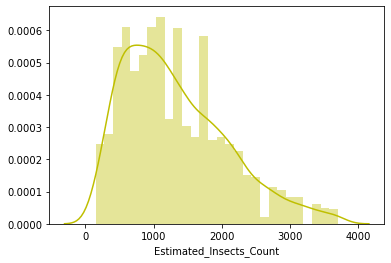

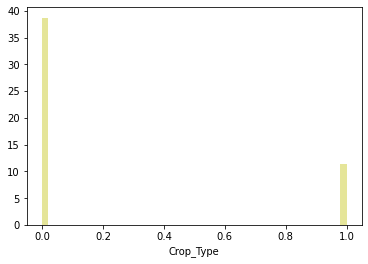

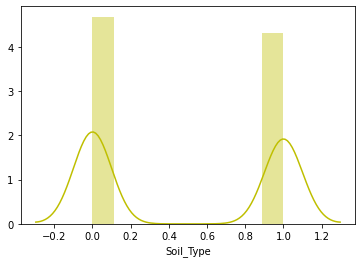

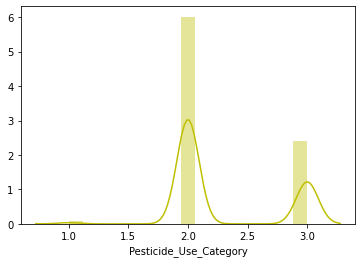

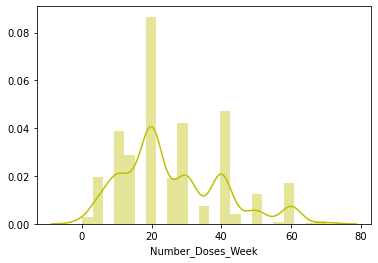

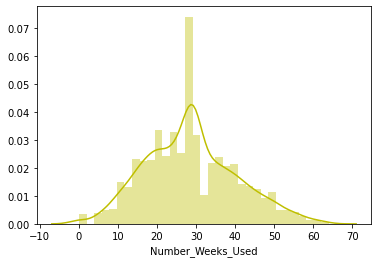

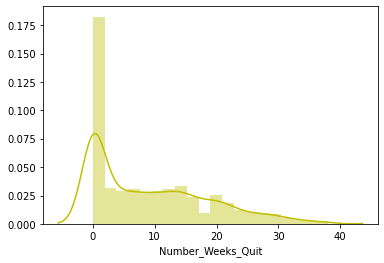

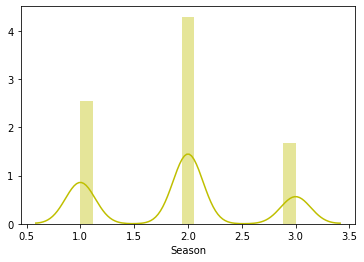

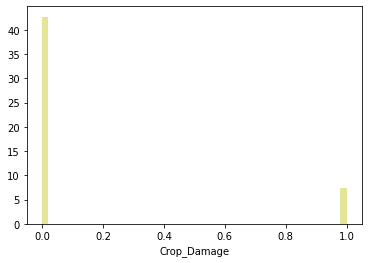

In [247]:
for col in train.describe().columns:
    sns.distplot(train[col],color="y")
    plt.show()
    

In [248]:
#Removing skewness by applying sqrt and cbrt method
train.skew()
for col in train.skew().index:
    if col in train.describe().columns:
        if train[col].skew()>0.55:
            train[col]=np.sqrt(train[col])
        if train[col].skew()<0.55:
            train[col]=np.cbrt(train[col])

# By seeing the agriculture data i got the clarity that i have to classify the crops is alive,damages due other cause,damage due to pesticides,so it's a classification problem,so i will build the model of classification.

# Feature Selection

In [249]:
x=train.drop(columns=["Crop_Damage"],axis=1)
y=train["Crop_Damage"]

In [250]:
#Applying StandardScaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

# Buidding Machine Learning Models

In [251]:
#spitting the data into training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=42,stratify=y)

In [252]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3059, 8)
(1311, 8)
(3059,)
(1311,)


In [253]:
#importing all the model library
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
#importing boosting library
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
#importing error metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc
from sklearn.model_selection import GridSearchCV,cross_val_score

In [254]:
#All algorithm by using loop
model=[GaussianNB(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),AdaBoostClassifier(),
      GradientBoostingClassifier(),BaggingClassifier()]
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print("Accuarcy_Score of",m,"is")
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print("****************************************************************************************")
    print("/n")

Accuarcy_Score of GaussianNB() is
0.8520213577421816
[[1063   56]
 [ 138   54]]
              precision    recall  f1-score   support

         0.0       0.89      0.95      0.92      1119
         1.0       0.49      0.28      0.36       192

    accuracy                           0.85      1311
   macro avg       0.69      0.62      0.64      1311
weighted avg       0.83      0.85      0.83      1311

****************************************************************************************
/n
Accuarcy_Score of SVC() is
0.8611746758199847
[[1117    2]
 [ 180   12]]
              precision    recall  f1-score   support

         0.0       0.86      1.00      0.92      1119
         1.0       0.86      0.06      0.12       192

    accuracy                           0.86      1311
   macro avg       0.86      0.53      0.52      1311
weighted avg       0.86      0.86      0.81      1311

****************************************************************************************
/n
Accuarcy_

In [255]:
#cross validation models
models=[GaussianNB(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),AdaBoostClassifier(),
       GradientBoostingClassifier(),BaggingClassifier()]
for n in models:
    score=cross_val_score(n,x,y,cv=6,scoring="accuracy")
    print("Models:",n)
    print("Score:",score)
    print("Mean Score:",score.mean())
    print("Standard Deviation:",score.std())
    print("***********************************************************************************************")
    print("/n")
    
    

Models: GaussianNB()
Score: [0.46502058 0.87242798 0.85302198 0.55631868 0.87774725 0.85302198]
Mean Score: 0.7462597416301121
Standard Deviation: 0.16890668808913895
***********************************************************************************************
/n
Models: SVC()
Score: [0.82578875 0.85322359 0.8543956  0.82554945 0.8543956  0.85302198]
Mean Score: 0.8443958305069416
Standard Deviation: 0.013252296674811096
***********************************************************************************************
/n
Models: DecisionTreeClassifier()
Score: [0.69958848 0.74485597 0.74862637 0.7032967  0.72802198 0.78021978]
Mean Score: 0.7341015466015467
Standard Deviation: 0.027780602060746135
***********************************************************************************************
/n
Models: KNeighborsClassifier()
Score: [0.74211248 0.80109739 0.84615385 0.74862637 0.80357143 0.84615385]
Mean Score: 0.7979525618414507
Standard Deviation: 0.04131056465896309
******************

# Using GridSearchcv to find out best parameter

In [256]:
#using best gridsearchcv to find best parameter in svm
parameters={"kernel" :["linear","rbf","poly"], "C":[1,10], "random_state":[42,60]}
svc=SVC()
clf=GridSearchCV(svc,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'C': 1, 'kernel': 'poly', 'random_state': 42}


In [257]:
svc=SVC(kernel="poly",C=1,random_state=42)
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.8619374523264683
[[1118    1]
 [ 180   12]]
              precision    recall  f1-score   support

         0.0       0.86      1.00      0.93      1119
         1.0       0.92      0.06      0.12       192

    accuracy                           0.86      1311
   macro avg       0.89      0.53      0.52      1311
weighted avg       0.87      0.86      0.81      1311



Text(0.5, 1.0, 'Support Vector Classification')

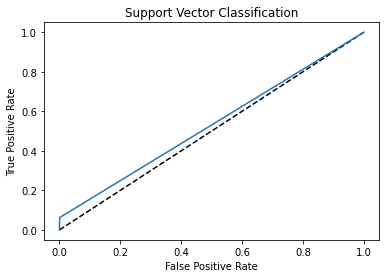

In [258]:
#Applying roc_curve,
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
predsvc=svc.predict(x_test)
fpr,tpr,threshold=roc_curve(y_test,predsvc)
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="SVC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Support Vector Classification")



# Conclusion:

In [259]:
train_crop=np.array(y_test)
predicted_crop=np.array(svc.predict(x_test))

In [261]:
Predicted=pd.DataFrame({"train_crop":train_crop,"predicted_crop":predicted_crop},index=range(len(train_crop)))

In [262]:
Predicted

,train_crop,predicted_crop
0,1.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,1.0,0.0
...,...,...
1306,0.0,0.0
1307,0.0,0.0
1308,0.0,0.0
1309,0.0,0.0


In [263]:
import pickle 

In [264]:
filename="Agriculture_data.pkl"
pickle.dump(svc,open(filename,"wb"))

# Test Data

In [265]:
from scipy.stats import zscore
z=np.abs(zscore(test_data))
z

array([[1.30318366e+00, 2.03615391e+00, 1.09360445e+00, ...,
        5.85986262e-16, 7.96003797e-01, 1.72804130e-01],
       [1.04035366e+00, 2.03615391e+00, 1.09360445e+00, ...,
        2.39438582e+00, 7.96003797e-01, 1.72804130e-01],
       [7.84627185e-01, 2.03615391e+00, 9.14407397e-01, ...,
        2.39438582e+00, 7.96003797e-01, 1.72804130e-01],
       ...,
       [1.85564227e-01, 4.91122009e-01, 1.09360445e+00, ...,
        1.32227276e+00, 1.79995135e+00, 1.28629553e+00],
       [9.08507165e-02, 4.91122009e-01, 1.09360445e+00, ...,
        4.92072401e-01, 2.31665722e-01, 1.28629553e+00],
       [9.08507165e-02, 4.91122009e-01, 1.09360445e+00, ...,
        5.85986262e-16, 1.46134850e+00, 1.63190379e+00]])

In [266]:
threshold=3
print(np.where(z>3))

(array([  50,   83,  129,  136,  179,  255,  280,  281,  282,  501,  502,
        503,  535,  574,  613,  630,  751,  775,  827,  829,  853,  868,
        870,  871,  883,  890,  895,  897,  902,  904,  910,  911,  912,
        913,  914,  915,  916, 1030, 1152], dtype=int32), array([4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 0, 0, 0, 0, 0, 0, 0, 4, 4], dtype=int32))


In [267]:
test=test_data[(z<3).all(axis=1)]

In [268]:
print(test_data.shape)
print(test.shape)

(1199, 8)
(1160, 8)


In [270]:
#showing percent loss in test data
percentloss=(1199-1160)/1199*100
print(percentloss)

3.252710592160134


# Removing Skewness

In [273]:
#Removing skewness in test data by sqrt and cbrt method.
test.skew()
for col in test.skew().index:
    if col in test.describe().columns:
        if test[col].skew()>0.55:
            test[col]=np.sqrt(test[col])
        if test[col].skew()<0.55:
            test[col]=np.cbrt(test[col])
        
    


# Now i will test the data where i got the best score in train data. 

In [274]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
test=sc.fit_transform(test)

In [275]:
#testing the data 
model=pickle.load(open("Agriculture_data.pkl","rb"))
print(model)

SVC(C=1, kernel='poly', random_state=42)


In [276]:
Prediction=model.predict(test)

In [277]:
Prediction

array([0., 1., 1., ..., 0., 0., 0.])

# Conclusion

In [279]:
train_crop

array([1., 0., 0., ..., 0., 0., 1.])

In [280]:
train_crop=np.array(y_test)

In [294]:
train_crop=pd.DataFrame(predsvc,columns=["Crop_train"])

In [285]:
test

array([0., 1., 1., ..., 0., 0., 0.])

In [290]:
test=pd.DataFrame(test)

In [291]:
test

,0
0,0.0
1,1.0
2,1.0
3,1.0
4,0.0
...,...
1155,0.0
1156,0.0
1157,0.0
1158,0.0


In [296]:
train_crop

,Crop_train
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
1306,0.0
1307,0.0
1308,0.0
1309,0.0
